**Install Required Libraries**

In [56]:
!pip install qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms pylatexenc

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## Solving a Simple Linear System using Quantum Phase Estimation (QPE)

This notebook simulates a quantum algorithm to solve a linear system of equations $$ A|x\rangle = |b\rangle $$ inspired by the HHL (Harrow-Hassidim-Lloyd) algorithm.

We use:
- A simplified matrix \( A = X \), with known eigenvalues ±1.
- A basic form of **Quantum Phase Estimation** to extract eigenvalues.
- A controlled rotation step to simulate eigenvalue inversion \$$lambda^{-1} $$
- Visualization of final state using a Bloch sphere.

Note: This is a conceptual simulation and not a full HHL implementation.


In [58]:
# Using 3 qubits: [0] eigenvalue qubit, [1] system qubit, [2] ancilla for λ⁻¹ rotation
n_qubits = 3
qc = QuantumCircuit(n_qubits, 1)  # One classical bit for measuring system qubit

## Step 1: Initialize \( |b⟩ = |+⟩ \) State on System Qubit

We begin by preparing the system qubit in the state:

$$
|b\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
$$

This represents the normalized right-hand side vector b of our linear system.


In [59]:
# Prepare |b⟩ = |+⟩ on qubit 1 (system)
qc.h(1)

## Step 2: Apply Quantum Phase Estimation

We simulate controlled evolution under matrix \( A = X \), whose eigenvalues are ±1.
QPE here is simplified using one eigenvalue qubit:
- Apply Hadamard to eigenvalue qubit.
- Apply controlled-X gate (acts like controlled-A).
- Apply inverse Hadamard to complete QPE.

In [60]:
qc.h(0)        # Prepare eigenvalue register
qc.cx(0, 1)    # Controlled evolution under A = X
qc.h(0)        # Complete QPE

## Step 3: Simulate λ⁻¹ with Controlled Rotation on Ancilla

This rotation step approximates dividing by eigenvalue lambda. The controlled rotation angle theta simulates:
$$
R_y(2\theta), \quad \text{where} \quad \theta = \sin^{-1}(1/2)
$$
The rotation is applied to the ancilla qubit, controlled by the eigenvalue qubit.

In [61]:
theta = np.arcsin(1 / 2)
qc.cry(2 * theta, 0, 2)  # Controlled rotation on ancilla

## Step 4: Inverse QPE

We uncompute the eigenvalue register using the inverse of the QPE subroutine.
This step disentangles the eigenvalue qubit from the rest of the system.

In [62]:
qc.h(0)
qc.cx(0, 1)
qc.h(0)

## Step 5: Measure the System Qubit

We now measure the system qubit to extract the solution state $$|x\rangle$$ to the linear system $$ A|x\rangle = |b\rangle $$

We also save the statevector before measurement to visualize it on the Bloch sphere.

In [63]:
qc.save_statevector()  # Save final statevector before measurement
qc.measure(1, 0)        # Measure system qubit

## Step 6: Simulate and Visualize the Results

We run the quantum circuit on Qiskit's Aer's statevector simulator:
- Print the measurement counts.
- Plot histogram of measurement outcomes.
- Display Bloch vector of the quantum state before measurement.

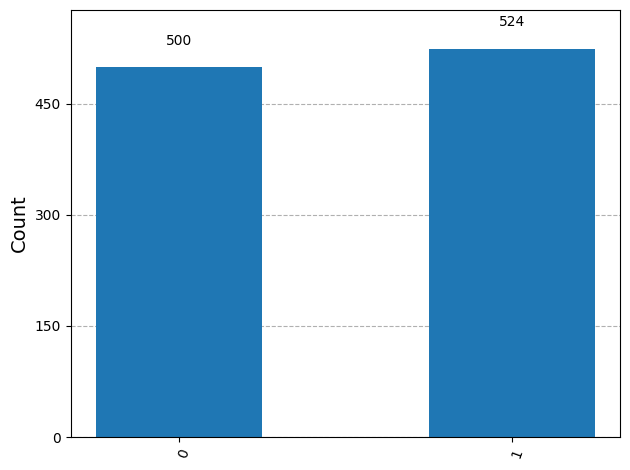

In [64]:
# Simulate the circuit
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# Histogram of measurement results
counts = result.get_counts()
plot_histogram(counts)

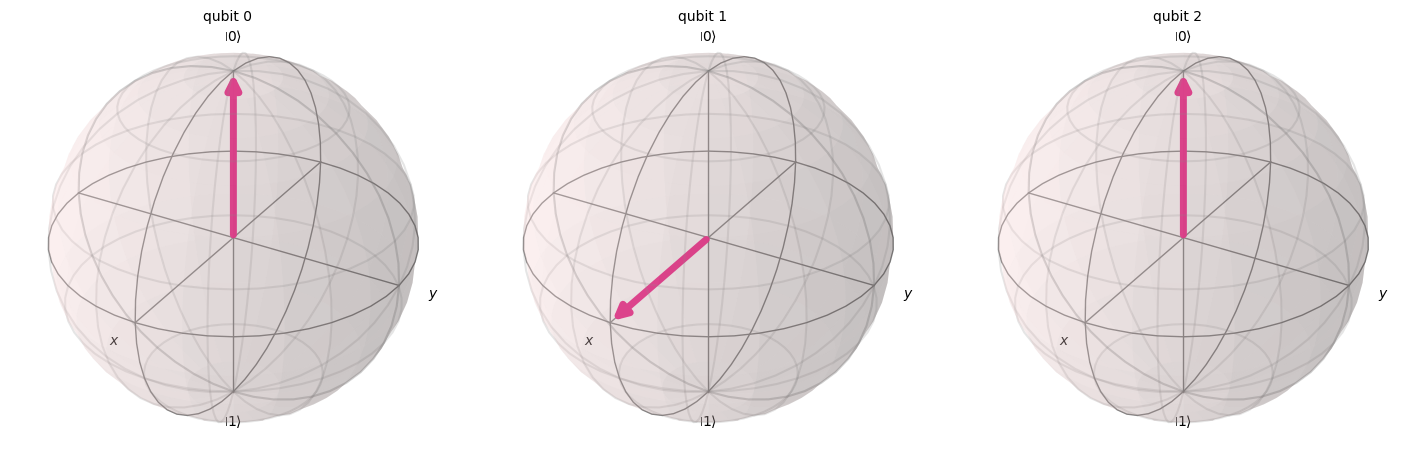

In [65]:
# Plot Bloch sphere of system qubit state
statevector = result.data(0)["statevector"]
plot_bloch_multivector(statevector)

## Full Quantum Circuit

This diagram shows the complete sequence of gates applied during the simulation.


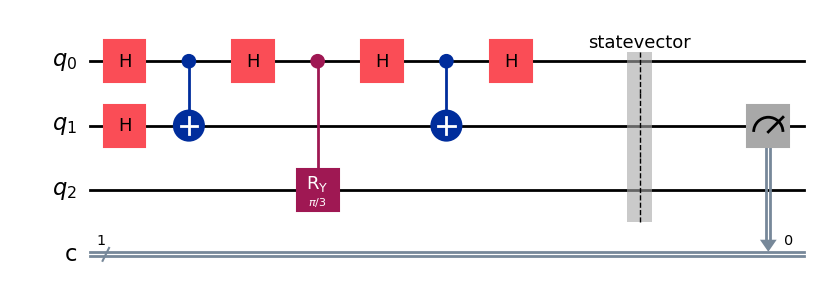

In [66]:
qc.draw("mpl")